In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data=pd.read_csv(r"C:\Users\Mayuri\Downloads\mnist_784_csv.csv")

In [3]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [8]:
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [9]:
def Add_noise(images,noise_value=0.5):
    noise=noise_value*np.random.normal(loc=0.0,scale=1.0,size=images.shape)
    noisy_images=noise+images
    return np.clip(noisy_images,0.,1.)

In [10]:
x_train_noisy=Add_noise(x_train)
x_test_noisy=Add_noise(x_test)

In [11]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),activation='relu',c,
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),activation='relu',padding='same'),
    UpSampling2D((2,2)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    UpSampling2D((2,2)),
    Conv2D(1,(3,3),activation='sigmoid',padding='same')
])

C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
print(f"x_train shape: {x_train.shape}")
print(f"x_train_noisy shape: {x_train_noisy.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"x_test_noisy shape: {x_test_noisy.shape}")

x_train shape: (56000, 28, 28, 1)
x_train_noisy shape: (56000, 28, 28, 1)
x_test shape: (14000, 28, 28, 1)
x_test_noisy shape: (14000, 28, 28, 1)


In [14]:
history=model.fit(x_train_noisy,x_train,epochs=10,batch_size=128,validation_data=(x_test_noisy,x_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - loss: 0.2677 - val_loss: 0.1232
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 0.1202 - val_loss: 0.1138
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - loss: 0.1128 - val_loss: 0.1098
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 83s 129ms/step - loss: 0.1093 - val_loss: 0.1076
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - loss: 0.1071 - val_loss: 0.1057
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - loss: 0.1052 - val_loss: 0.1046
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 0.1041 - val_loss: 0.1032
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - loss: 0.1030 - val_loss: 0.1023
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - loss: 0.1020 - val_loss: 0.1016
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 0.1015 - val_loss: 0.1009


In [23]:
val_loss,val_acc=model.evaluate(x_test_noisy,x_test)
print("Val Loss:",val_loss)
print("Val Accuracy:",val_acc)

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8133 - loss: 0.1009
Val Loss: 0.10094933211803436
Val Accuracy: 0.8131141662597656


In [16]:
x_test_denoised=model.predict(x_test_noisy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


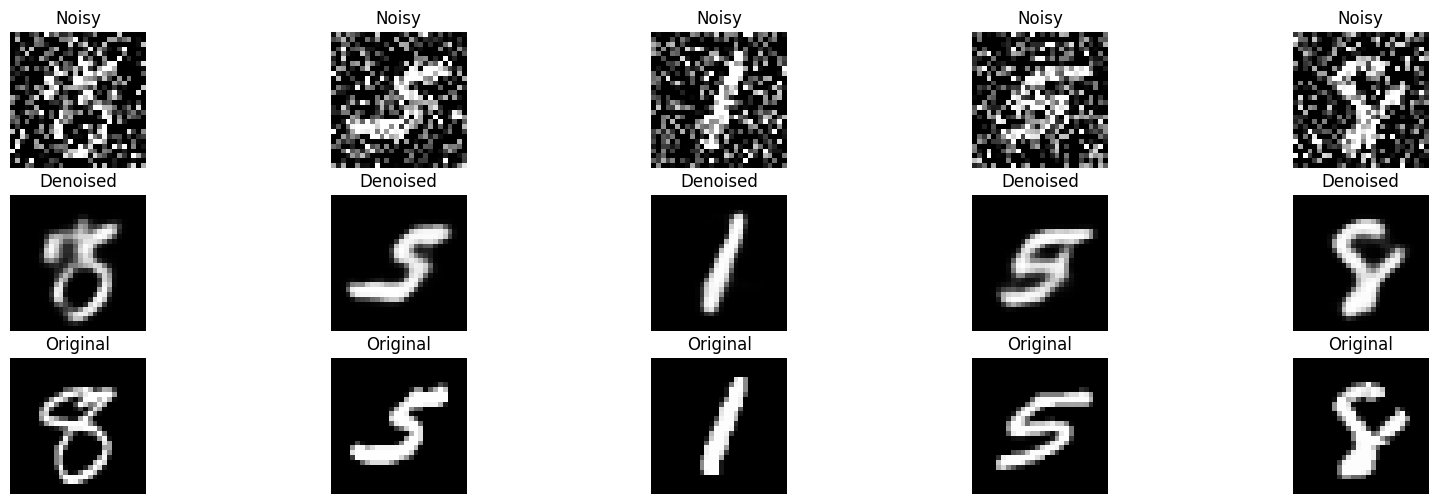

In [21]:
n=5
plt.figure(figsize=(20,6))
for i in range (n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(x_test_denoised[i].reshape(28,28),cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    ax=plt.subplot(3,n,i+1+n*2)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title("Original")
    plt.axis('off')
    

plt.show()